<a href="https://colab.research.google.com/github/Aioshu/Data-Structure-And-Algorithm/blob/main/Activation_and_Gradients%2C_batch_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
!git clone https://github.com/karpathy/makemore.git

fatal: destination path 'makemore' already exists and is not an empty directory.


In [139]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
words=open('/content/makemore/names.txt','r').read().splitlines()

In [141]:
# build vocabulary of characters

chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(f"{itos=}")
vocab_size=len(itos)
print(f"{vocab_size=}")

itos={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
vocab_size=27


In [142]:
# build the dataset
block_size=3 # context length: how many characters


def build_dataset (words):
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi [ch]
      X.append(context)
      Y.append(ix)
      context = context [1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print (X.shape, Y.shape)
  return X, Y




import random
random.seed(42)
random.shuffle (words)
n1 = int(0.8*len (words))
n2 = int(0.9*len (words))
Xtr, Ytr =build_dataset (words [: n1]) # 80
Xdev, Ydev = build_dataset (words [n1: n2]) # 10
Xte, Yte = build_dataset (words [n2:]) # 10
# torch.Size([182625, 3]) torch. Size([182625])
# torch.Size([22655, 3]) torch. Size([22655])
# torch.Size([22866, 3]) torch. Size ([22866])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [143]:
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden= 200 # the number of neurons in the hidden layer of the MLP
g= torch.Generator().manual_seed (2147483647) # for reproducibility
C =torch.randn ( (vocab_size, n_embd), generator=g) # (27,10) intial
W1=torch. randn( (n_embd * block_size, n_hidden), generator=g) #* (5/3)/((n_embd*block_size)**0.5)# W1=(10*3,200)
b1 = torch. randn(n_hidden, generator=g)#*0.01 # bias = (200)
W2 = torch.randn ( (n_hidden, vocab_size), generator=g)#*0.01# W1=(200,27)
b2= torch.randn (vocab_size, generator=g)*0# (27,)

bngain=torch.ones((1,n_hidden))
bnbias=torch.ones((1,n_hidden))

parameters = [C, W1, b1, W2, b2]
print (sum(p.nelement ( ) for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

11897


In [144]:
batch_size=32
ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
ix
#
emb=C[Xtr[ix]]
print(f"{emb.shape=}")
embcat = emb.view (emb.shape[0], -1)
print(f"{embcat.shape=}")
hpreact= embcat @ W1 + b1
print(f"{hpreact.shape=}")
h = torch.tanh (hpreact)
print(f"{h.shape=}")
logits= h@W2 + b2
print(f"{logits.shape=}")

emb.shape=torch.Size([32, 3, 10])
embcat.shape=torch.Size([32, 30])
hpreact.shape=torch.Size([32, 200])
h.shape=torch.Size([32, 200])
logits.shape=torch.Size([32, 27])


In [145]:
hpreact.mean(0,keepdims=True)

tensor([[-4.1351, -1.4333, -2.6204,  5.2466,  1.4428,  2.2342,  2.9207, -3.4029,
         -2.4664,  3.0368,  0.2130, -4.4843,  0.6468,  2.2024,  0.7064,  0.4629,
          3.7851, -4.1523, -1.5622,  4.6506,  0.2982, -0.3983,  2.2651,  1.8642,
          1.2275,  4.0951,  3.1420,  0.3905,  0.4311,  2.4423, -0.3463, -0.6762,
          0.5576, -0.5290, -1.7203, -3.4642, -1.0341, -2.1031,  0.3022,  1.9227,
         -0.0510, -3.9018, -0.7374, -2.9385,  0.1878, -0.7136,  1.1751, -1.7285,
          2.4909,  2.0460, -0.4769, -0.9861,  2.3577,  2.5508,  0.3195, -1.8302,
          0.9613,  4.4983,  1.4466,  0.6593, -0.2733,  1.0145,  0.1062, -0.0854,
          1.5539,  1.1577,  2.5708, -0.1042, -0.8439, -0.6123,  1.8896, -0.0814,
          2.3946, -3.1007, -4.3271, -0.5682,  4.1782, -1.2720, -0.6384, -0.0493,
          3.1676,  3.9681,  1.4389,  2.2492,  1.7030, -0.0594, -2.5038, -0.6407,
         -0.9404, -1.0191,  2.7870,  2.0640,  0.2476, -0.4240,  0.5599, -1.3291,
         -1.5131, -1.5566,  

In [146]:
max_steps = 20000
batch_size = 32
lossi = []
for i in range(max_steps):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb =Xtr[ix], Ytr[ix] # batch X,Y
  # forward pass
  emb =C[Xb] # embed the characters into vectors
  embcat = emb.view (emb.shape[0], -1) # concatenate the vectors
  hpreact= embcat @ W1 + b1 # hidden layer pre-activation
  # make hpreact roughly guassin
  #hpreact=bngain* (hpreact-hpreact.mean(0,keepdims=True))/hpreact.std(0,keepdims=True)# +bnbias
  # scale and shift
  h = torch.tanh (hpreact) # hidden layer
  logits= h@W2 + b2 # output layer
  loss= F.cross_entropy (logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad=None
  loss.backward()

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data = -lr * p.grad
  # track stats
  if i % 10000 == 0: # print every once in a while
    print (f' {i:7d}/{max_steps: 7d}: {loss.item():.4f}')
  lossi.append(loss. log10().item())

       0/  20000: 25.0089
   10000/  20000: 3.2890


[]

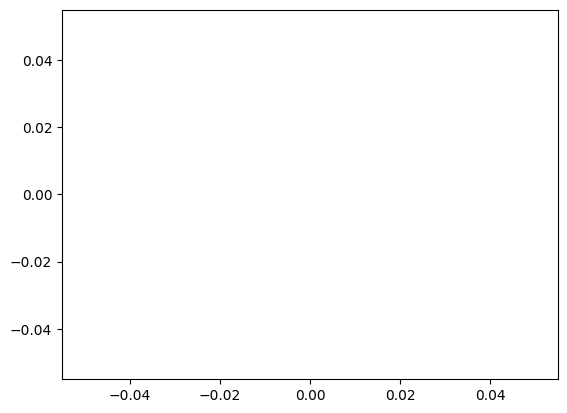

In [147]:
plt.plot()

In [148]:
# calibrate the batch norm at the end of training
with torch.no_grad():
  # pass the training set through
  emb = C [Xtr]
  embcat = emb.view (emb.shape[0], -1)
  hpreact= embcat @ W1 + b1
  # measure the mean/std over the entire training set
  bnmean =hpreact. mean (0, keepdim=True)
  bnstd =hpreact. std (0, keepdim=True)

In [153]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss (split):
  x, y = {
  'train': (Xtr, Ytr),
  'val': (Xdev, Ydev),
  'test': (Xte, Yte),
  }[split]
  emb=C[x] # (N, block_size, n_embd)
  embcat=emb.view (emb.shape[0], -1) # concat into (N, block_size* n_embd)

  hpreact=embcat @ W1 + b1
  hpreact=bngain* (hpreact-bnmean)/bnstd #+bnbias

  h = torch.tanh (hpreact) #3 #(N, n_hidden)
  logits= h @ W2 + b2 # (N, vocab_size)
  loss= F.cross_entropy (logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train nan
val nan


In [150]:
x.view(-1)

tensor([-0.9405,  1.0155, -1.5374,  ..., -1.3853, -0.8683, -0.6437])

tensor(0.0063) tensor(1.0102)
tensor(0.0030) tensor(1.0214)


(array([4.64941063e-05, 2.32470531e-05, 1.16235266e-04, 2.32470531e-04,
        2.55717585e-04, 5.57929276e-04, 1.25534087e-03, 1.46456435e-03,
        2.44094058e-03, 3.60329324e-03, 6.74164541e-03, 1.10888444e-02,
        1.49478552e-02, 2.37352413e-02, 3.75207438e-02, 5.23988578e-02,
        7.50414876e-02, 1.01589622e-01, 1.43945753e-01, 1.93624706e-01,
        2.47999563e-01, 3.03815738e-01, 3.58190595e-01, 3.99942302e-01,
        4.24467943e-01, 4.10728935e-01, 3.80298542e-01, 3.42917281e-01,
        2.81452072e-01, 2.30494532e-01, 1.76282404e-01, 1.30694933e-01,
        9.27789891e-02, 6.66260543e-02, 4.54479889e-02, 3.09883218e-02,
        2.03411715e-02, 1.21814558e-02, 8.50842145e-03, 5.74202213e-03,
        3.46381092e-03, 2.02249362e-03, 1.37157614e-03, 9.06635073e-04,
        4.41694010e-04, 3.48705797e-04, 6.97411594e-05, 1.16235266e-04,
        4.64941063e-05, 9.29882126e-05]),
 array([-5.33585119, -5.12077017, -4.90568914, -4.69060812, -4.4755271 ,
        -4.26044607, 

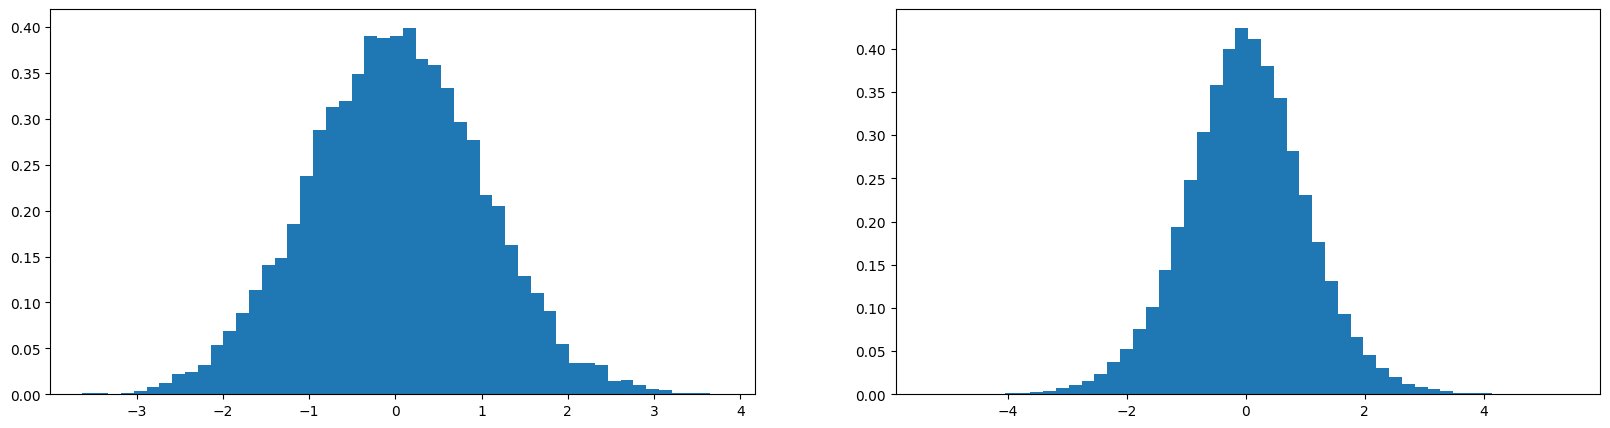

In [151]:
x=torch.randn(1000,10)
w=torch.randn(10,200) /10**.5

y=x@w
print(x.mean(),x.std())
print(y.mean(),y.std())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(),50,density=True)
plt.subplot(122)
plt.hist(y.view(-1).tolist(),50,density=True)

In [ ]:
########################################################### Cleaner Code ####################################################################

In [173]:
# class Linear:
#   def _init__(self, fan_in, fan_out, bias=True):
#     self.weight= torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
#     self.bias= torch.zeros(fan_out) if bias else None
#   def _call_(self, x):
#     self.out =x @ self.weight
#     if self.bias is not None:
#       self.out += self.bias
#     return self.out
#   def parameters (self):
#     return [self.weight] + ([] if self.bias is None else [self.bias])

# Define the Linear class
class Linear:
    def __init__(self, fan_in, fan_out, bias=True):
        self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
        self.bias = torch.zeros(fan_out) if bias else None

    def __call__(self, x):
        self.out = x @ self.weight
        if self.bias is not None:
            self.out += self.bias
        return self.out

    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])



class BatchNorm1d:
    def __init__(self, dim, eps=1e-5, momentum=0.1):
      self.eps =eps
      self.momentum = momentum
      self.training = True
      # parameters (trained with backprop)
      self.gamma= torch.ones(dim)
      self.beta =torch.zeros(dim)
      # buffers (trained with a running 'momentum update')
      self.running_mean = torch.zeros(dim)
      self.running_var= torch.ones(dim)
    def __call__(self, x):
      # calculate the forward pass
      if self.training:
        xmean= x.mean (0, keepdim=True) # batch mean
        xvar = x.var(0, keepdim=True, unbiased=True) # batch variance
      else:
        xmean =self.running_mean
        xvar =self.running_var
      xhat =(x-xmean)/ torch.sqrt(xvar + self.eps) # normalize to unit variance
      self.out =self.gamma *xhat + self.beta
      # update the buffers
      if self.training:
        with torch.no_grad():
          self.running_mean = (1 -self.momentum) * self. running_mean + self.momentum * xmean
          self.running_var = (1 -self.momentum) * self.running_var + self.momentum * xvar
      return self.out

      def parameters (self):
        return [self.gamma, self.beta]
class Tanh:
    def __call__(self, x):
      self.out= torch.tanh(x)
      return self.out
    def parameters (self):
      return []


n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g =torch.Generator().manual_seed (2147483647) # for reproducibility
C =torch.randn ( (vocab_size, n_embd), generator=g)
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear( n_hidden, n_hidden), Tanh(),
#   Linear( n_hidden, n_hidden), Tanh(),
#   Linear( n_hidden, n_hidden), Tanh(),
#   Linear( n_hidden, n_hidden), Tanh(),
#   Linear( n_hidden, vocab_size),
# ]

# Recreate the layers list with the Linear class
layers = [
    Linear(n_embd * block_size, n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), Tanh(),
    Linear(n_hidden, n_hidden), Tanh(),
    Linear(n_hidden, vocab_size),
]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 5/3
parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement ( ) for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad= True

46497


In [174]:
Tanh()

In [175]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []
for i in range(max_steps):
# minibatch construct
  ix =torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb= Xtr[ix], Ytr[ix] # batch X,Y
  # forward pass
  emb = C [Xb] # embed the characters into vectors
  x = emb.view (emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
    loss= F.cross_entropy(x, Yb) # loss function
  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad =None
  loss.backward()
  # update
  lr= 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad
  # track stats
  if i % 10000 == 0: # print every once in a while
    print (f' {i:7d}/{max_steps: 7d}: {loss.item():.4f}')
  lossi.append(loss. log10().item())
  break # AFTER_DEBUG: would take out obviously to run full optimization

       0/ 200000: 3.2962


Text(0.5, 1.0, 'activation distribution')

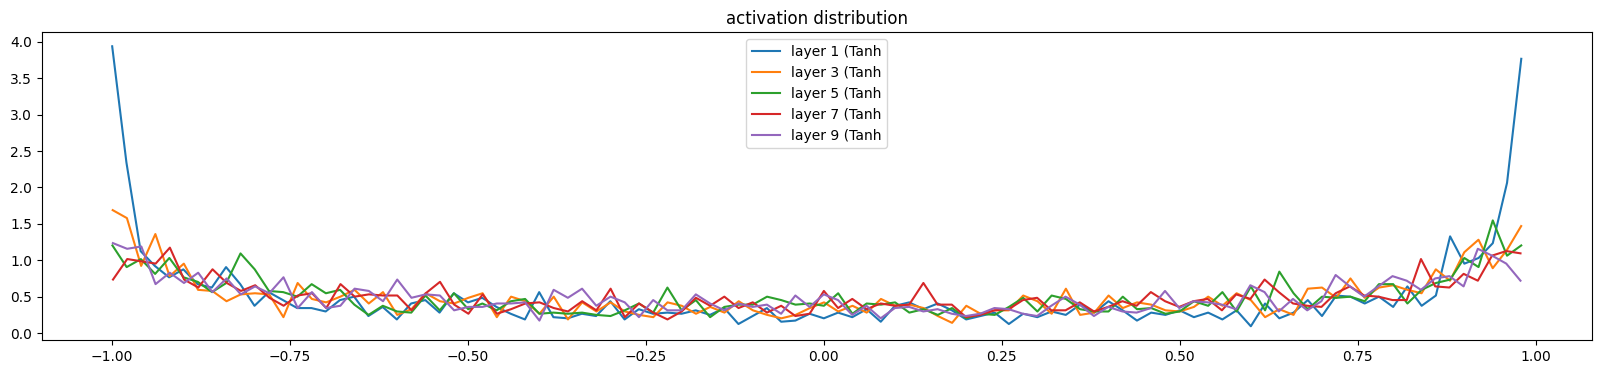

In [183]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate (layers [:-1]): # note: exclude the output layer
  if isinstance (layer, Tanh):
    t = layer.out
    #print(f'layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' (i, layer. __class__ .__name__, t.mean(), t.std (), (t.abs() > 0.97).float().mean()*100))
    #print(f'layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' (i, layer. __class__ .__name__, t.mean(), t.std (), (t.abs() > 0.97).float().mean()*100))
    hy, hx =torch. histogram (t, density=True)
    plt.plot(hx [:-1].detach (), hy.detach())
    legends.append(f'layer {i} ({layer. __class__ .__name__}')
plt. legend (legends);
plt.title('activation distribution')

Text(0.5, 1.0, 'activation distribution')

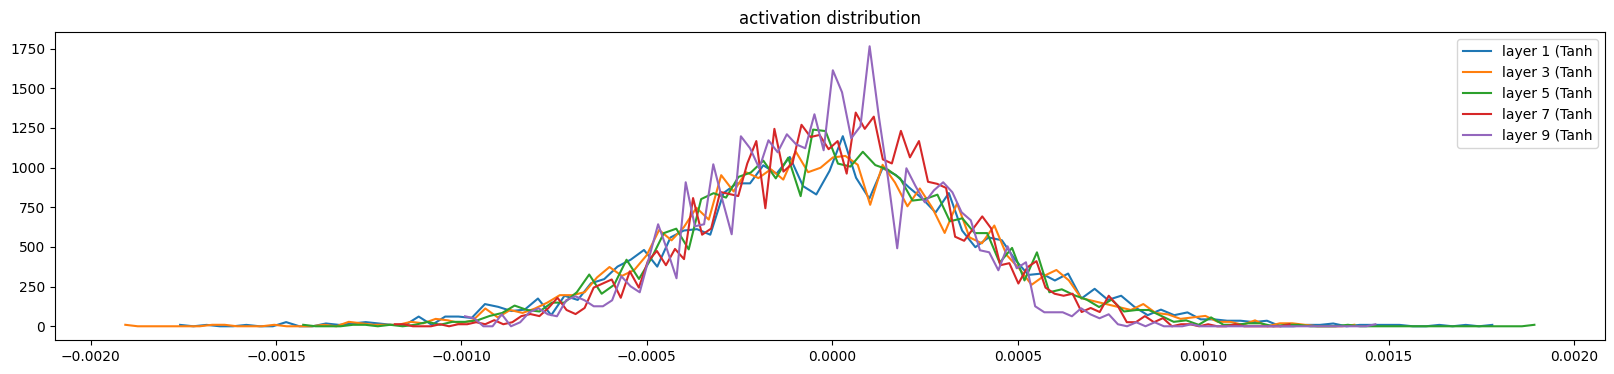

In [185]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate (layers [:-1]): # note: exclude the output layer
  if isinstance (layer, Tanh):
    t = layer.out.grad
    #print(f'layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' (i, layer. __class__ .__name__, t.mean(), t.std (), (t.abs() > 0.97).float().mean()*100))
    #print(f'layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' (i, layer. __class__ .__name__, t.mean(), t.std (), (t.abs() > 0.97).float().mean()*100))
    hy, hx =torch. histogram (t, density=True)
    plt.plot(hx [:-1].detach (), hy.detach())
    legends.append(f'layer {i} ({layer. __class__ .__name__}')
plt. legend (legends);
plt.title('activation distribution')